In [1]:
import numpy as np
import networkx as nx
import sys
sys.path.append("..")
from labelpropagation.label_propagation import LabelPropagation
from collections import Counter
from networkx.algorithms.community import asyn_lpa_communities
import matplotlib.pyplot as plt
import matplotlib
import time

In [2]:
def draw_graph(graph, label_map, title):
    colors = [label_map.get(node) for node in graph.nodes()]
#     plt.subplot(111)
    nx.draw(graph, with_labels=graph.nodes, node_color=colors)
    plt.title(title)
    plt.show()

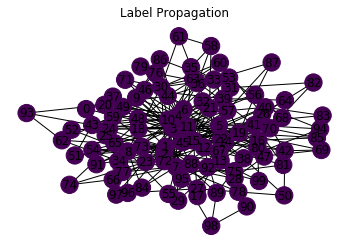

Modularity 3.7675094048705915e-17


In [61]:
G = nx.barabasi_albert_graph(100, 3)
lp = LabelPropagation(network=G)
_, _ = lp.start(label_ties_resolution="retention", convergence_criterium="change", order="asynchronous",
                        weighted=False)
comsLabelPropa = list(asyn_lpa_communities(G))
draw_graph(G, lp.node_labels, "Label Propagation")
print("Modularity", nx.algorithms.community.modularity(G, lp.final_communities))

In [11]:
final = []
for c in comsLabelPropa:
    final.append(list(c))
    print(c)
    print("---")
print("Modularity", nx.algorithms.community.modularity(G, final))

NameError: name 'comsLabelPropa' is not defined

0.06914591789245605
['NBA', 'espn', 'undisputed', 'RealSkipBayless', 'KingJames', 'ShannonSharpe', 'wojespn', 'JoelEmbiid', 'BleacherReport', 'pachumtorres', 'JimmyButler', 'sixers', 'KDTrey5', 'Chris_Broussard', 'AntDavis23', 'russwest44', 'stephenasmith', 'KendrickPerkins', 'MiamiHEAT', 'BenSimmons25']
['yetikatt', 'heroicdev', 'Hypeatized']
['CO5MONAUT', 'megalojohn_']
['StartupSlovenia', 'adannaacho', 'Inc', 'randal_olson', 'TimSweeneyEpic', 'OpenAI', 'directus', 'Dropbox', 'TheASF', 'BlackTowerCrew', 'infincube', 'seanjtaylor', 'codinginswift', 'strataconf', 'SpaceX', 'Tesla', 'nvidia', 'jetbrains', 'chethaase', 'daamirv', 'ML_Hipster', 'nodejs', 'BevEve', 'csfinch', 'intel', 'AndroidDev', 'OracleAI', 'datascifellows', 'fchollet', 'Boris_Cergol', 'cryengine', 'Google', 'awscloud', 'pycharm', 'AndrewYNg', 'MSFTResearch', 'ubuntu', 'DataSciFact', 'RedHat', 'marcuswood23', 'DataKind', 'androidcentral', 'ApacheMahout', 'Tenebrous', 'MongoDB', 'sallyeaves', 'bradfordcross', 'GraphFound

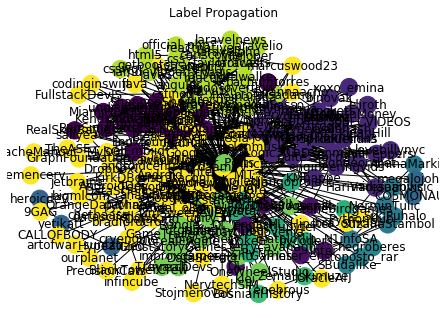

In [4]:
lp = LabelPropagation("../data/my-twitter/followees.txt", "U")
start_time = time.time()
graph, labels = lp.start(label_ties_resolution="retention", convergence_criterium="change",
                         order="asynchronous", weighted=False)
print(time.time() - start_time)

for comm in lp.final_communities:
    print(comm)
print(len(lp.final_communities))
draw_graph(graph, labels, "Label Propagation")

Reached maximum recursive steps
19.337783575057983
['stonebirdgames', 'WillingCarol', 'ThePSF', 'ProjectJupyter', 'djangoproject', 'pycoders', 'SciPyTip', 'matplotlib', 'PyData', 'PythonHub', 'bokeh']
['marcuswood23', 'pachumtorres', 'GhostStoryGames', 'nodejs', 'bradfordcross', 'RedHat', 'cryengine', 'directus', 'Boris_Cergol', 'linuxfoundation', 'randal_olson', 'SpaceX', 'Google', 'terrycavanagh', 'FullstackDevJS', 'KirkDBorne', 'heroicdev', 'GCPcloud', 'chethaase', 'unity3d', 'Tenebrous', 'DataScienceCtrl', 'fchollet', 'PrecisionCats', 'java', 'GraphFoundation', 'daamirv', 'artofwar_suntzu', 'MSFTResearch', 'BlackTowerCrew', 'datascifellows', 'ApacheMahout', 'StojmenovaK', 'BevEve', 'improxgames', 'seanjtaylor', 'TilenPogacnik', 'ourplanet', 'jure', 'bigmlcom', 'Hypeatized', 'ubuntu', 'Tesla', 'GoogleAI', 'UnrealDevs', 'getbootstrap', 'pycharm', '9GAG', 'OneWheelStudio', 'Inc', 'Android', 'MIT', 'yetikatt', 'MongoDB', 'Bungie', 'analyticbridge', 'utgame', 'OracleAI', 'CALLOFBODY', '

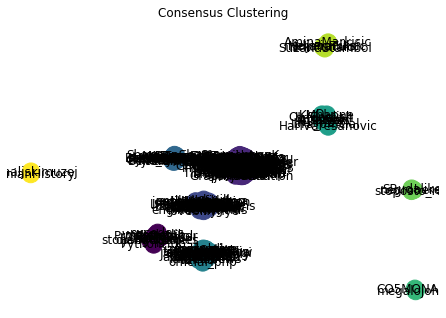

In [36]:
lp = LabelPropagation("../data/my-twitter/followees.txt", "U")
start_time = time.time()
graph, labels = lp.consensus_clustering(label_ties_resolution="retention", convergence_criterium="change",
                                       order="asynchronous", threshold=0.5, number_of_partitions=20, weighted=False,
                                       fcc=False)
print(time.time() - start_time)
for comm in lp.final_communities:
    print(comm)
print(len(lp.final_communities))
draw_graph(graph, labels, "Consensus Clustering")

5.890728235244751
['stonebirdgames', 'marcuswood23', 'GhostStoryGames', 'bokeh', 'nodejs', 'bradfordcross', 'sudo_overflow', 'vuejs', 'djangoproject', 'RedHat', 'cryengine', 'reactnative', 'directus', 'Boris_Cergol', 'eveporcello', 'linuxfoundation', 'randal_olson', 'SpaceX', 'Google', 'terrycavanagh', 'pycoders', 'csswg', 'traversymedia', 'WillingCarol', 'FullstackDevJS', 'KirkDBorne', 'reactjs', 'heroicdev', 'GCPcloud', 'laravelphp', 'chethaase', 'unity3d', 'Tenebrous', 'DataScienceCtrl', 'fchollet', 'PrecisionCats', 'java', 'GraphFoundation', 'daamirv', 'artofwar_suntzu', 'MSFTResearch', 'youyuxi', 'datascifellows', 'BlackTowerCrew', 'ApacheMahout', 'StojmenovaK', 'laracasts', 'BevEve', 'Netlify', 'improxgames', 'seanjtaylor', 'TilenPogacnik', 'ourplanet', 'jure', 'JavaScriptDaily', 'PyData', 'bigmlcom', 'Hypeatized', 'ubuntu', 'Tesla', 'themarcba', 'GoogleAI', 'UnrealDevs', 'getbootstrap', 'pycharm', '9GAG', 'OneWheelStudio', 'Inc', 'taylorotwell', 'profulsadangi', 'angular', 'Andr

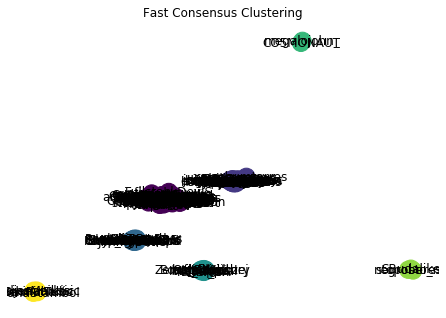

In [34]:
lp = LabelPropagation("../data/my-twitter/followees.txt", "U")
start_time = time.time()
graph, labels = lp.consensus_clustering(label_ties_resolution="retention",
                                      convergence_criterium="change", order="asynchronous",
                                        threshold=0.5, number_of_partitions=10, weighted=False, fcc=True,
                                        convergence_factor=0.02)
print(time.time() - start_time)
for comm in lp.final_communities:
    print(comm)
print(len(lp.final_communities))
draw_graph(graph, labels, "Fast Consensus Clustering")

4.194738388061523
5


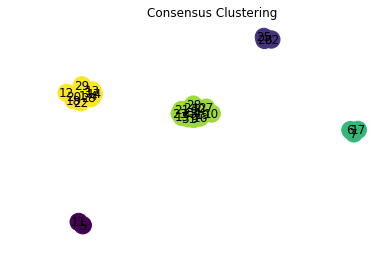

In [12]:
start_time = time.time()
graph, labels = lp.consensus_clustering(label_ties_resolution="retention", convergence_criterium="strong-community",
                                        order="asynchronous", threshold=0.5, number_of_partitions=12, weighted=False)
print(time.time() - start_time)
print(len(Counter(labels.values())))
draw_graph(graph, labels, "Consensus Clustering")

1.2037789821624756
5


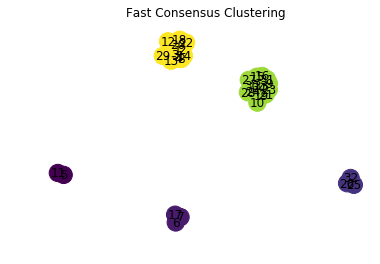

In [13]:
start_time = time.time()
graph, labels = lp.consensus_clustering(label_ties_resolution="retention", convergence_criterium="strong-community",
                                        order="asynchronous", threshold=0.5, number_of_partitions=12, weighted=False, fcc=True, convergence_factor=0.02)
print(time.time() - start_time)
print(len(Counter(labels.values())))
draw_graph(graph, labels, "Fast Consensus Clustering")

BLa
CONNECTIVITY
1
0.02191305160522461
1
3



c:\python\python35\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


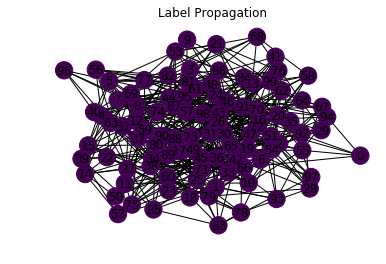

BLa
CONNECTIVITY
1
0.1925063133239746
1
2

BLa
CONNECTIVITY
1
7.81506609916687
1
2



In [ ]:
no_of_nodes = [100, 1000, 10000, 100000, 1000000]
for n in no_of_nodes:
    G = nx.erdos_renyi_graph(n, 0.1)
    print("BLa")
    lp = LabelPropagation(network=G)
    start_time = time.time()
    graph, labels = lp.start(label_ties_resolution="retention", convergence_criterium="strong-community",
                             order="asynchronous", weighted=False)
    print(time.time() - start_time)
    print(len(Counter(labels.values())))
    print(lp.iterations)
    print()
    
    if n == 100:
        draw_graph(graph, labels, "Label Propagation")

# LPA

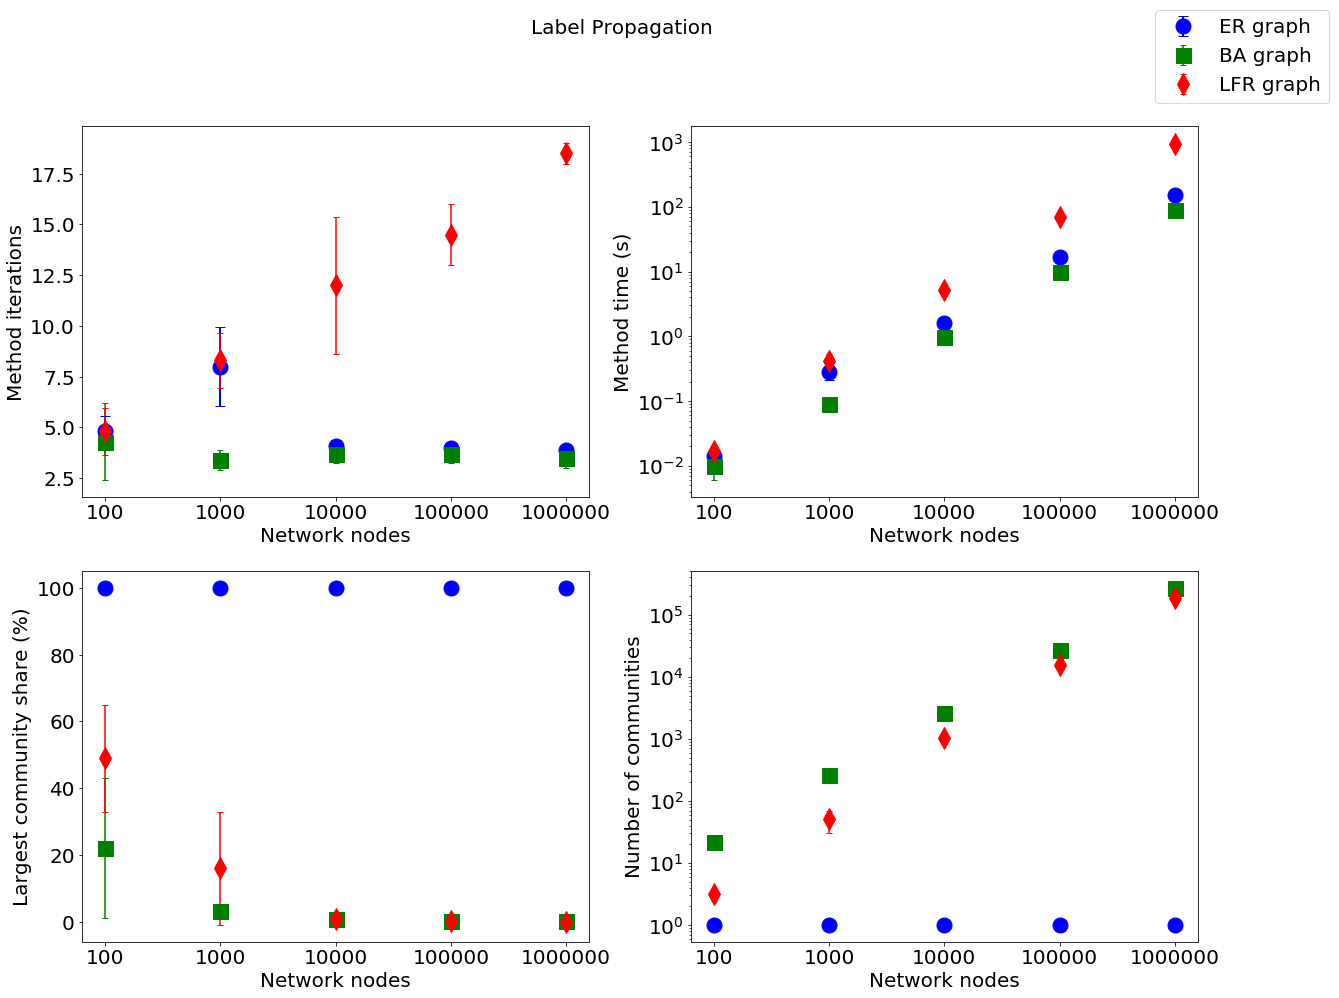

In [11]:
# Now switch to a more OO interface to exercise more features.
lab1 = 'ER graph'
lab2 = 'BA graph'
lab3 = 'LFR graph'

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(20, 15))
ax = axs[0,0]
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100", "1000", "10000", "100000", "1000000"]
y = [4.8, 8.0, 4.1, 4.0, 3.9]
e = [0.75, 1.95, 0.3, 0.0, 0.1]
y1 = [4.3, 3.4, 3.7, 3.7, 3.5]
e1 = [1.9, 0.49, 0.46, 0.46, 0.5]
y2 = [4.8, 8.3, 12.0, 14.5, 18.5]
e2 = [1.16, 1.35, 3.37, 1.5, 0.5]
er_line, caps, c = ax.errorbar(x, y, e, label=lab1, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True, capsize=5, elinewidth=2)
ba_line, caps2, c2 = ax.errorbar(x, y1, e1, label=lab2, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
lfr_line, caps3, c3 = ax.errorbar(x, y2, e2, label=lab3, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Method iterations", fontsize=20)

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
# ax.locator_params(nbins=4)

ax = axs[0,1]
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100", "1000", "10000", "100000", "1000000"]
y = [0.014, 0.28, 1.59, 16.7, 154.4]
e = [0.002, 0.07, 0.11, 0.41, 2.2]
y1 = [0.01, 0.089, 0.97, 9.97, 89.7]
e1 = [0.004, 0.011, 0.12, 1.18, 3.4]
y2 = [0.017, 0.41, 5.23, 70.2, 939.2]
e2 = [0.004, 0.12, 0.85, 2.35, 20.3]
er_line, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True, capsize=5, elinewidth=2)
ba_line, caps2, c2 = ax.errorbar(x, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
lfr_line, caps3, c3 = ax.errorbar(x, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Method time (s)", fontsize=20)

ax = axs[1,0]
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100", "1000", "10000", "100000", "1000000"]
y = [100.0, 100.0, 100.0, 100.0, 100.0]
e = [0.0, 0.0, 0.0, 0.0, 0.0]
y1 = [22.0, 3.3, 0.8, 0.3, 0.09]
e1 = [21.0, 1.2, 0.2, 0.1, 0.02]
y2 = [49.0, 16.0, 0.7, 0.07, 0.02]
e2 = [16.0, 17.0, 0.2, 0.04, 0.01]
er_line, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True, capsize=5, elinewidth=2)
ba_line, caps2, c2 = ax.errorbar(x, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
lfr_line, caps3, c3 = ax.errorbar(x, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Largest community share (%)", fontsize=20)

ax = axs[1,1]
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100", "1000", "10000", "100000", "1000000"]
y = [1.0, 1.0, 1.0, 1.0, 1.0]
e = [0.0, 0.0, 0.0, 0.0, 0.0]
y1 = [21.9, 261.5, 2655.3, 26628.4, 270278.3]
e1 = [5.8, 4.6, 16.4, 61.5, 236.8]
y2 = [3.1, 50.3, 1028.7, 15610.4, 189978.5]
e2 = [0.7, 19.6, 57.3, 167.3, 488.5]
er_line, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True, capsize=5, elinewidth=2)
ba_line, caps2, c2 = ax.errorbar(x, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
lfr_line, caps3, c3 = ax.errorbar(x, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Number of communities", fontsize=20)

fig.suptitle('Label Propagation', fontsize=20)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, prop={'size': 20})
plt.show()

# CC

c:\python\python35\lib\site-packages\matplotlib\axes\_base.py:3507: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  self.set_ylim(upper, lower, auto=None)


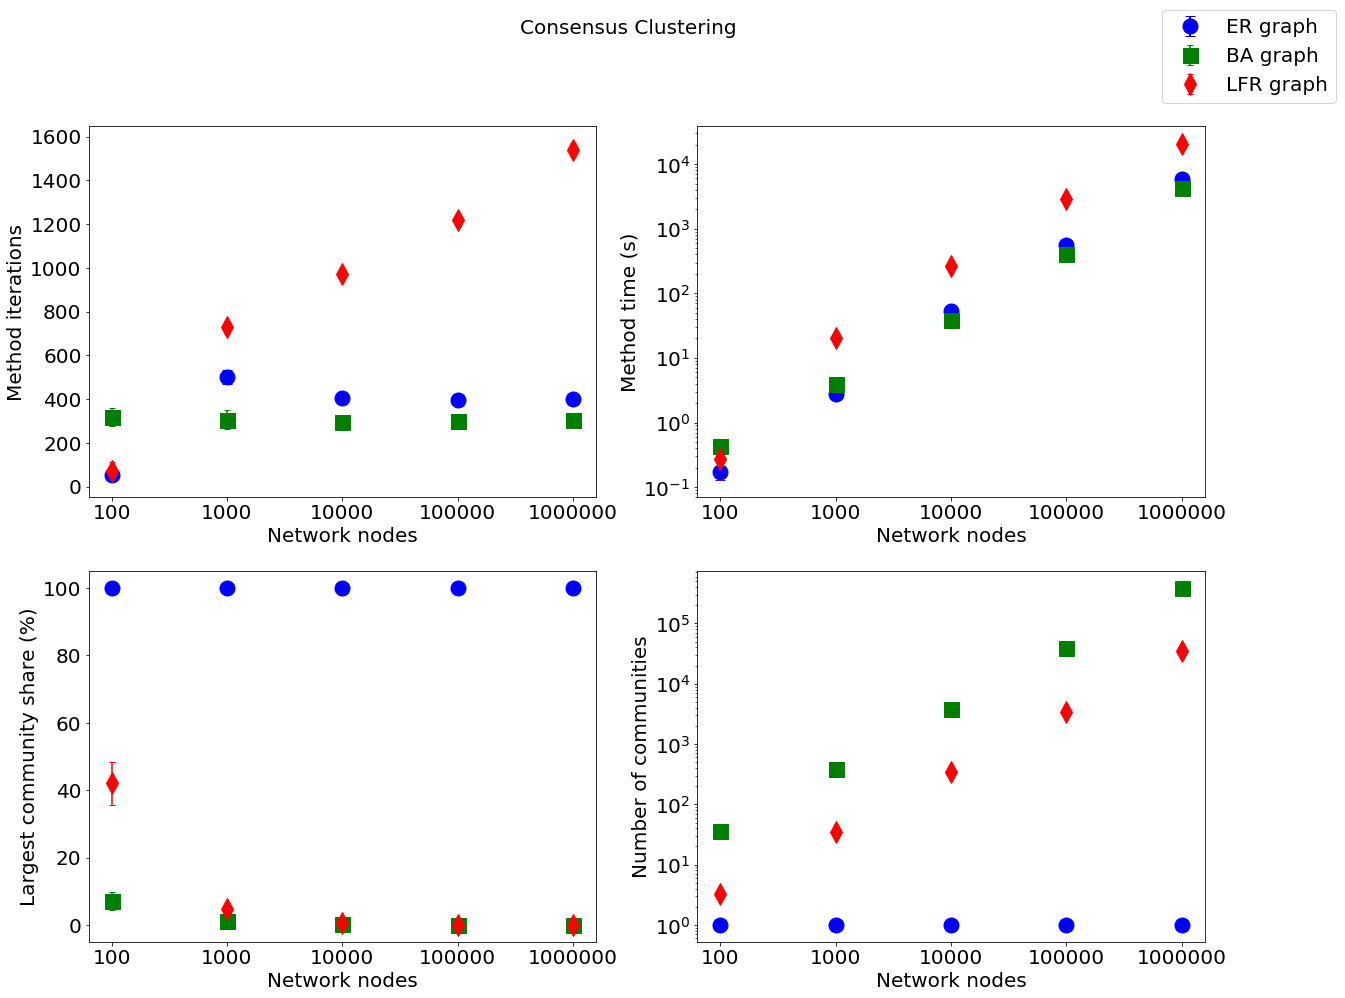

In [2]:
# Now switch to a more OO interface to exercise more features.
lab1 = 'ER graph'
lab2 = 'BA graph'
lab3 = 'LFR graph'

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(20, 15))
ax = axs[0,0]
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100", "1000", "10000", "100000", "1000000"]
y = [53.9, 502.9, 404.3, 395.2, 398.5]
e = [13.6, 32.1, 8.4, 18.2, 20.1]
y1 = [318.1, 306.0, 297.1, 301.0, 304.5]
e1 = [42.6, 43.1, 26.0, 21.4, 20.5]
y2 = [70.6, 727.7, 970.6, 1218.5, 1538.7]
e2 = [41.5, 28.7, 16.7, 26.5, 30.5]
er_line, caps, c = ax.errorbar(x, y, e, label=lab1, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True, capsize=5, elinewidth=2)
ba_line, caps2, c2 = ax.errorbar(x, y1, e1, label=lab2, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
lfr_line, caps3, c3 = ax.errorbar(x, y2, e2, label=lab3, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Method iterations", fontsize=20)

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
# ax.locator_params(nbins=4)

ax = axs[0,1]
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100", "1000", "10000", "100000", "1000000"]
y = [0.17, 2.8, 53.2, 556.52, 5821.7]
e = [0.042, 0.20, 1.18, 14.5, 153.4]
y1 = [0.43, 3.9, 38.62, 403.8, 4222.1]
e1 = [0.05, 0.42, 2.96, 20.4, 170.3]
y2 = [0.27, 20.7, 267.0, 2926.8, 20539.4]
e2 = [0.14, 0.65, 17.0, 67.5, 520.3]
er_line, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True, capsize=5, elinewidth=2)
ba_line, caps2, c2 = ax.errorbar(x, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
lfr_line, caps3, c3 = ax.errorbar(x, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Method time (s)", fontsize=20)

ax = axs[1,0]
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100", "1000", "10000", "100000", "1000000"]
y = [100.0, 100.0, 100.0, 100.0, 100.0]
e = [0.0, 0.0, 0.0, 0.0, 0.0]
y1 = [7.2, 1.1, 0.3, 0.1, 0.08]
e1 = [2.7, 0.3, 0.09, 0.04, 0.009]
y2 = [42.0, 4.8, 0.49, 0.049, 0.005]
e2 = [6.5, 0.1, 0.0, 0.0, 0.00]
er_line, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True, capsize=5, elinewidth=2)
ba_line, caps2, c2 = ax.errorbar(x, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
lfr_line, caps3, c3 = ax.errorbar(x, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Largest community share (%)", fontsize=20)

ax = axs[1,1]
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100", "1000", "10000", "100000", "1000000"]
y = [1.0, 1.0, 1.0, 1.0, 1.0]
e = [0.0, 0.0, 0.0, 0.0, 0.0]
y1 = [35.7, 386.5, 3864.6, 38671.1, 386525.4]
e1 = [2.9, 4.4, 21.4, 61.5, 337.3]
y2 = [3.2, 34.7, 346.3, 3443.5, 34759.8]
e2 = [0.4, 4.0, 6.2, 152.7, 388.1]
er_line, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True, capsize=5, elinewidth=2)
ba_line, caps2, c2 = ax.errorbar(x, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
lfr_line, caps3, c3 = ax.errorbar(x, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Number of communities", fontsize=20)

fig.suptitle('Consensus Clustering', fontsize=20)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, prop={'size': 20})
plt.show()

# FCC

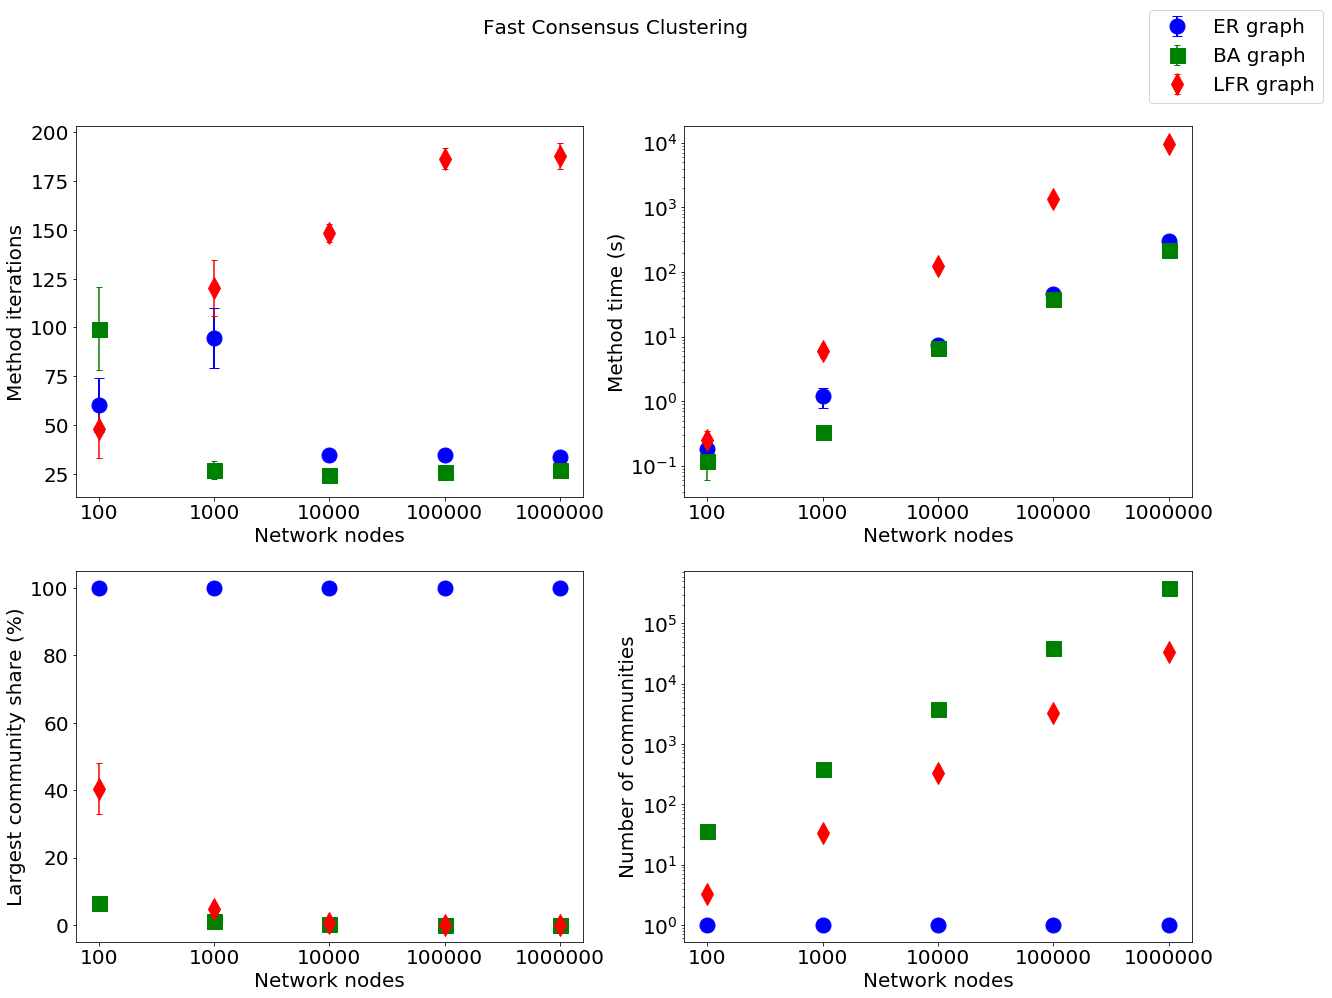

In [15]:
# Now switch to a more OO interface to exercise more features.
lab1 = 'ER graph'
lab2 = 'BA graph'
lab3 = 'LFR graph'

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(20, 15))
ax = axs[0,0]
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100", "1000", "10000", "100000", "1000000"]
y = [60.2, 94.7, 34.8, 34.8, 33.7]
e = [13.9, 15.3, 1.98, 1.87, 1.75]
y1 = [99.3, 27.0, 24.5, 26.1, 26.8]
e1 = [21.3, 4.5, 2.8, 3.2, 2.5]
y2 = [48.0, 120.2, 148.4, 186.5, 187.7]
e2 = [14.9, 14.6, 4.8, 5.5, 6.7]
er_line, caps, c = ax.errorbar(x, y, e, label=lab1, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True, capsize=5, elinewidth=2)
ba_line, caps2, c2 = ax.errorbar(x, y1, e1, label=lab2, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
lfr_line, caps3, c3 = ax.errorbar(x, y2, e2, label=lab3, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Method iterations", fontsize=20)

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
# ax.locator_params(nbins=4)

ax = axs[0,1]
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100", "1000", "10000", "100000", "1000000"]
y = [0.18, 1.2, 7.4, 45.6, 304.0]
e = [0.012, 0.42, 0.17, 2.5, 20.4]
y1 = [0.12, 0.33, 6.7, 38.5, 221.3]
e1 = [0.06, 0.04, 0.35, 3.4, 16.6]
y2 = [0.25, 5.9, 125.1, 1370.2, 9615.8]
e2 = [0.1, 1.3, 7.9, 78.5, 236.3]
er_line, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True, capsize=5, elinewidth=2)
ba_line, caps2, c2 = ax.errorbar(x, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
lfr_line, caps3, c3 = ax.errorbar(x, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Method time (s)", fontsize=20)

ax = axs[1,0]
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100", "1000", "10000", "100000", "1000000"]
y = [100.0, 100.0, 100.0, 100.0, 100.0]
e = [0.0, 0.0, 0.0, 0.0, 0.0]
y1 = [6.6, 1.1, 0.3, 0.1, 0.08]
e1 = [1.9, 0.3, 0.09, 0.04, 0.009]
y2 = [40.4, 4.8, 0.5, 0.05, 0.0049]
e2 = [7.6, 0.1, 0.0, 0.0, 0.00]
er_line, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True, capsize=5, elinewidth=2)
ba_line, caps2, c2 = ax.errorbar(x, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
lfr_line, caps3, c3 = ax.errorbar(x, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Largest community share (%)", fontsize=20)

ax = axs[1,1]
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100", "1000", "10000", "100000", "1000000"]
y = [1.0, 1.0, 1.0, 1.0, 1.0]
e = [0.0, 0.0, 0.0, 0.0, 0.0]
y1 = [36.3, 386.5, 3865.8, 38682.9, 386846.8]
e1 = [2.6, 4.4, 21.4, 59.6, 256.1]
y2 = [3.2, 33.3, 333.6, 3332.5, 33374.5]
e2 = [0.6, 0.78, 4.7, 25.7, 235.6]
er_line, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True, capsize=5, elinewidth=2)
ba_line, caps2, c2 = ax.errorbar(x, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
lfr_line, caps3, c3 = ax.errorbar(x, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Number of communities", fontsize=20)

fig.suptitle('Fast Consensus Clustering', fontsize=20)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, prop={'size': 20})
plt.show()

# LPA REAL

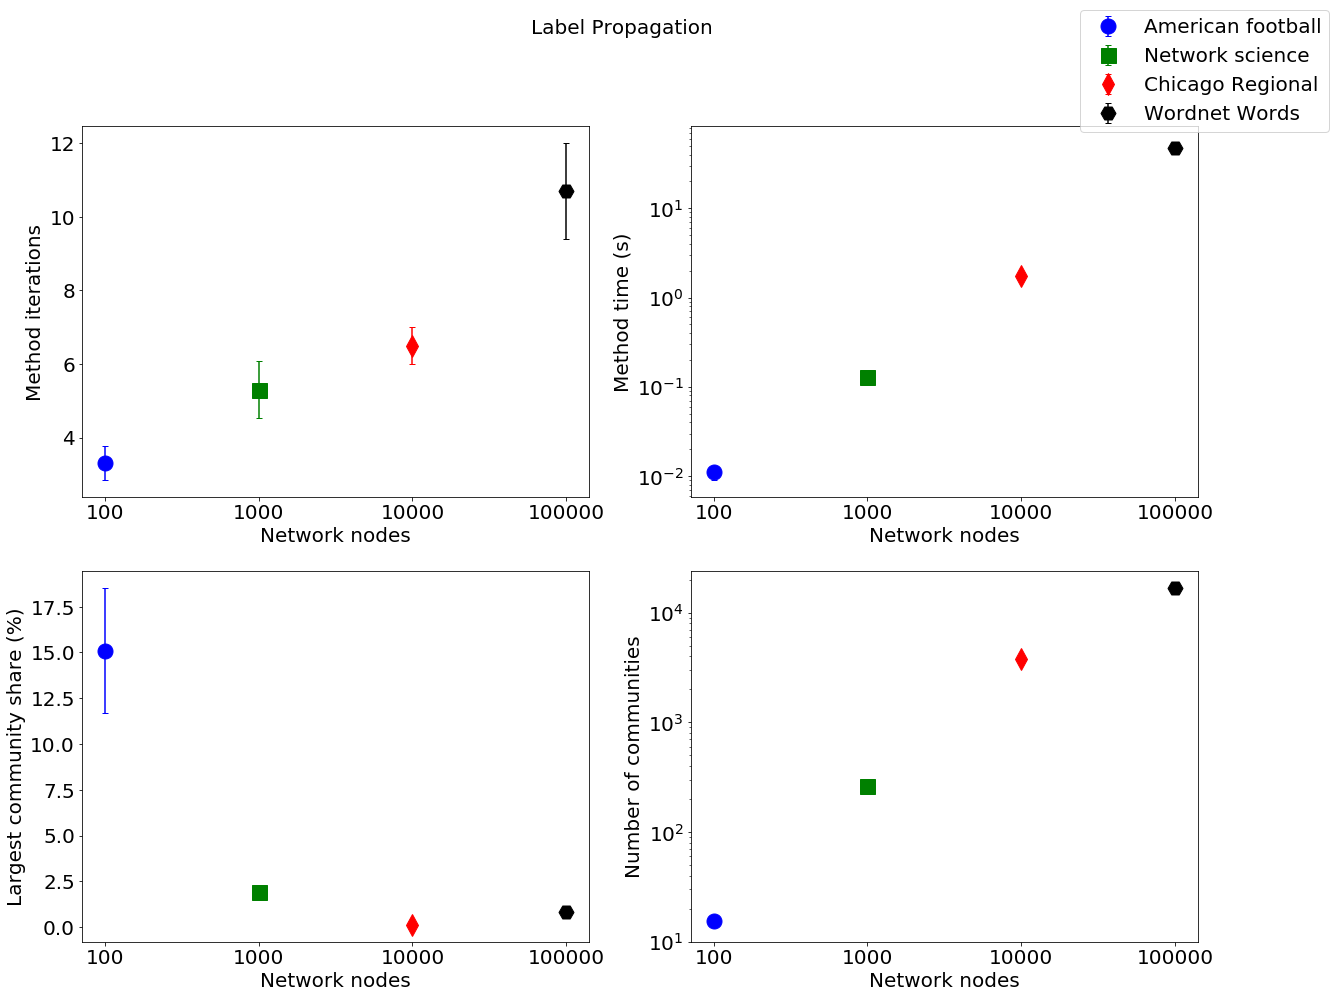

In [59]:
# Now switch to a more OO interface to exercise more features.
lab1 = 'American football'
lab2 = 'Network science'
lab3 = 'Chicago Regional'
lab4 = 'Wordnet Words'

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(20, 15))
ax = axs[0,0]
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100"]
y = [3.3]
e = [0.46]
x1 = ["1000"]
y1 = [5.3]
e1 = [0.78]
x2 = ["10000"]
y2 = [6.5]
e2 = [0.5]
x3 = ["100000"]
y3 = [10.7]
e3 = [1.3]
line1, caps, c = ax.errorbar(x, y, e, label=lab1, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True)
line2, caps2, c2 = ax.errorbar(x1, y1, e1, label=lab2, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
line3, caps3, c3 = ax.errorbar(x2, y2, e2, label=lab3, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
line4, caps4, c4 = ax.errorbar(x3, y3, e3, label=lab4, linestyle='None', marker='H', mfc='black', mec='black', color='black', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")
for cap in caps4:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Method iterations", fontsize=20)

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
# ax.locator_params(nbins=4)

ax = axs[0,1]
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100"]
y = [0.011]
e = [0.002]
x1 = ["1000"]
y1 = [0.13]
e1 = [0.024]
x2 = ["10000"]
y2 = [1.75]
e2 = [0.13]
x3 = ["100000"]
y3 = [47.8]
e3 = [5.8]
line1, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True)
line2, caps2, c2 = ax.errorbar(x1, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
line3, caps3, c3 = ax.errorbar(x2, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
line4, caps4, c4 = ax.errorbar(x3, y3, e3, linestyle='None', marker='H', mfc='black', mec='black', color='black', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")
for cap in caps4:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Method time (s)", fontsize=20)

ax = axs[1,0]
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100"]
y = [15.1]
e = [3.42]
x1 = ["1000"]
y1 = [1.94]
e1 = [0.18]
x2 = ["10000"]
y2 = [0.13]
e2 = [0.015]
x3 = ["100000"]
y3 = [0.83]
e3 = [0.13]
line1, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True)
line2, caps2, c2 = ax.errorbar(x1, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
line3, caps3, c3 = ax.errorbar(x2, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
line4, caps4, c4 = ax.errorbar(x3, y3, e3, linestyle='None', marker='H', mfc='black', mec='black', color='black', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")
for cap in caps4:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Largest community share (%)", fontsize=20)

ax = axs[1,1]
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100"]
y = [15.3]
e = [1.1]
x1 = ["1000"]
y1 = [260.4]
e1 = [4.0]
x2 = ["10000"]
y2 = [3814.7]
e2 = [17.2]
x3 = ["100000"]
y3 = [16699.3]
e3 = [57.5]
line1, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True)
line2, caps2, c2 = ax.errorbar(x1, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
line3, caps3, c3 = ax.errorbar(x2, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
line4, caps4, c4 = ax.errorbar(x3, y3, e3, linestyle='None', marker='H', mfc='black', mec='black', color='black', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")
for cap in caps4:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Number of communities", fontsize=20)

fig.suptitle('Label Propagation', fontsize=20)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, prop={'size': 20})
plt.show()

# CC REAL

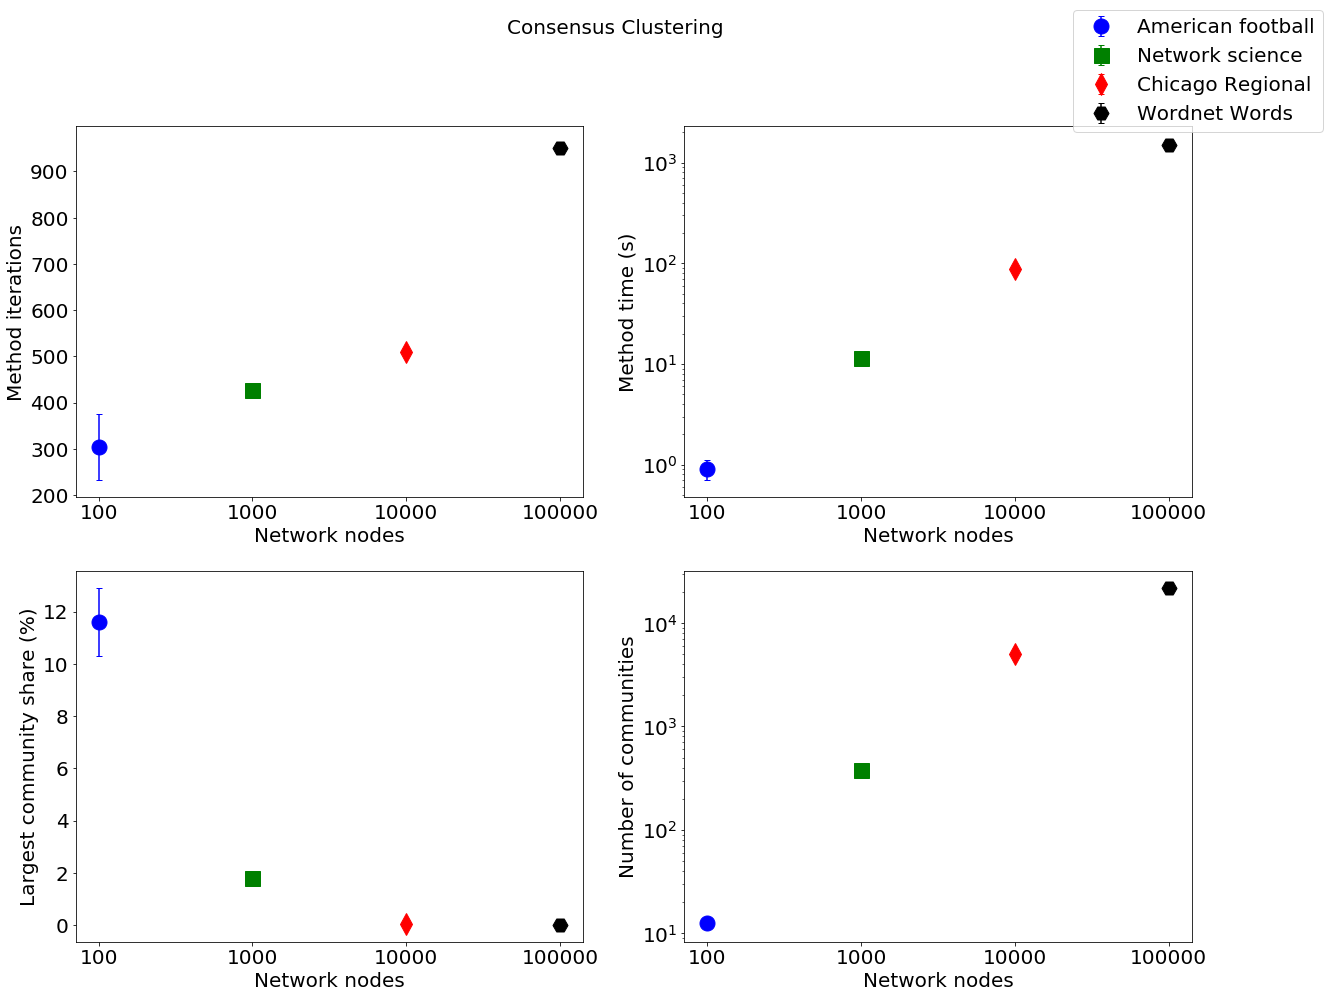

In [17]:
# Now switch to a more OO interface to exercise more features.
lab1 = 'American football'
lab2 = 'Network science'
lab3 = 'Chicago Regional'
lab4 = 'Wordnet Words'

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(20, 15))
ax = axs[0,0]
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100"]
y = [303.4]
e = [71.3]
x1 = ["1000"]
y1 = [426.9]
e1 = [11.5]
x2 = ["10000"]
y2 = [510.5]
e2 = [6.4]
x3 = ["100000"]
y3 = [950.7]
e3 = [10.4]
line1, caps, c = ax.errorbar(x, y, e, label=lab1, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True)
line2, caps2, c2 = ax.errorbar(x1, y1, e1, label=lab2, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
line3, caps3, c3 = ax.errorbar(x2, y2, e2, label=lab3, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
line4, caps4, c4 = ax.errorbar(x3, y3, e3, label=lab4, linestyle='None', marker='H', mfc='black', mec='black', color='black', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")
for cap in caps4:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Method iterations", fontsize=20)

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
# ax.locator_params(nbins=4)

ax = axs[0,1]
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100"]
y = [0.91]
e = [0.21]
x1 = ["1000"]
y1 = [11.4]
e1 = [0.3]
x2 = ["10000"]
y2 = [87.6]
e2 = [1.3]
x3 = ["100000"]
y3 = [1503.1]
e3 = [51.3]
line1, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True)
line2, caps2, c2 = ax.errorbar(x1, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
line3, caps3, c3 = ax.errorbar(x2, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
line4, caps4, c4 = ax.errorbar(x3, y3, e3, linestyle='None', marker='H', mfc='black', mec='black', color='black', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")
for cap in caps4:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Method time (s)", fontsize=20)

ax = axs[1,0]
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100"]
y = [11.6]
e = [1.3]
x1 = ["1000"]
y1 = [1.8]
e1 = [0.05]
x2 = ["10000"]
y2 = [0.06]
e2 = [0.0035]
x3 = ["100000"]
y3 = [0.01]
e3 = [0.0035]
line1, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True)
line2, caps2, c2 = ax.errorbar(x1, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
line3, caps3, c3 = ax.errorbar(x2, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
line4, caps4, c4 = ax.errorbar(x3, y3, e3, linestyle='None', marker='H', mfc='black', mec='black', color='black', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")
for cap in caps4:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Largest community share (%)", fontsize=20)

ax = axs[1,1]
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100"]
y = [12.5]
e = [0.5]
x1 = ["1000"]
y1 = [375.8]
e1 = [1.7]
x2 = ["10000"]
y2 = [5038.9]
e2 = [18.4]
x3 = ["100000"]
y3 = [21759.8]
e3 = [115.6]
line1, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True)
line2, caps2, c2 = ax.errorbar(x1, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
line3, caps3, c3 = ax.errorbar(x2, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
line4, caps4, c4 = ax.errorbar(x3, y3, e3, linestyle='None', marker='H', mfc='black', mec='black', color='black', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")
for cap in caps4:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Number of communities", fontsize=20)

fig.suptitle('Consensus Clustering', fontsize=20)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, prop={'size': 20})
plt.show()

# FCC REAL

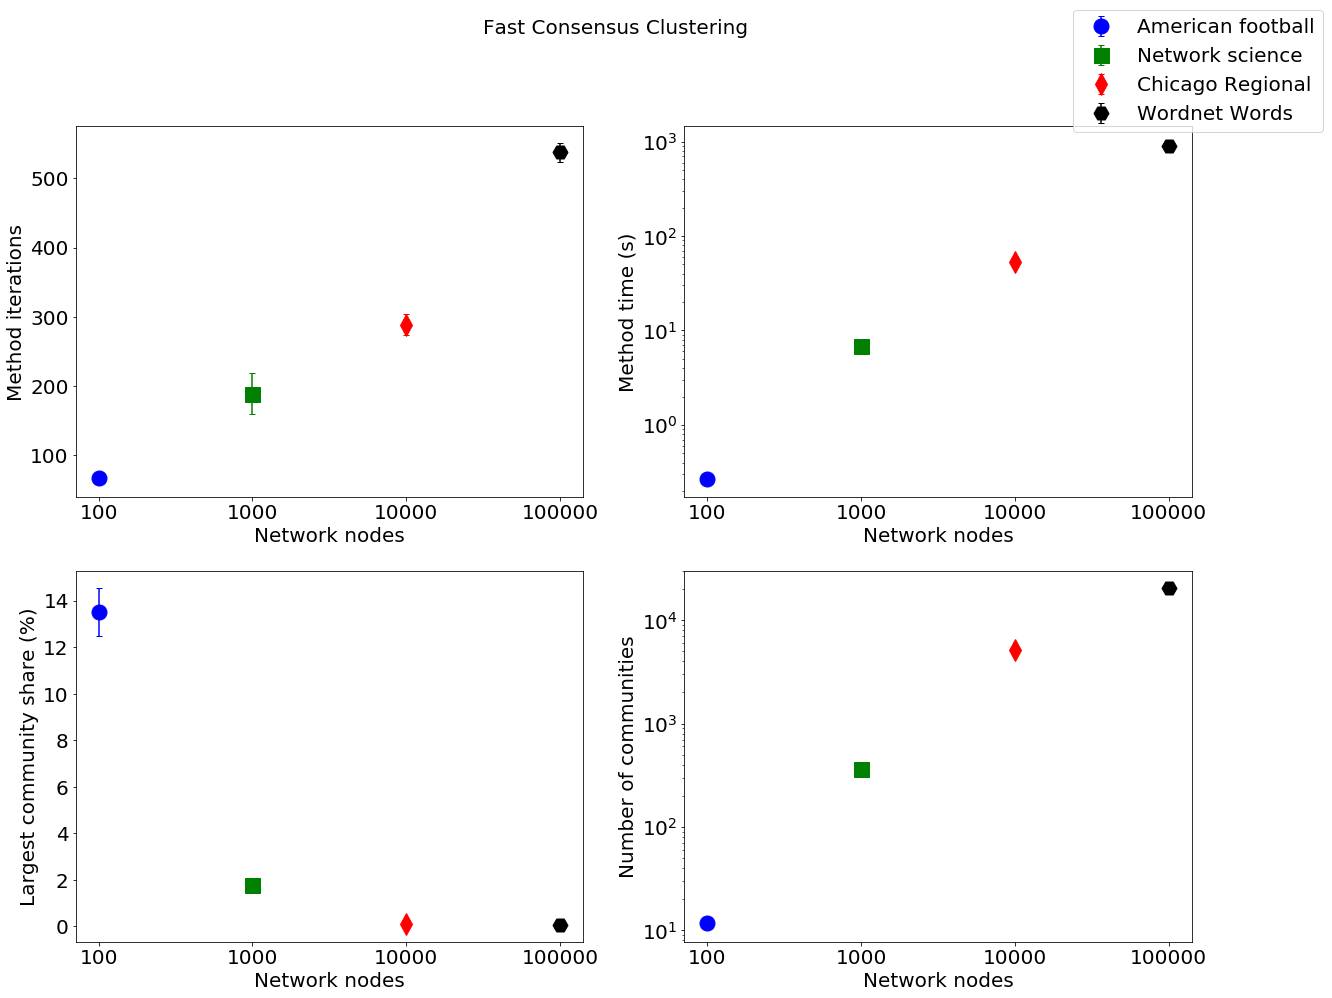

In [18]:
# Now switch to a more OO interface to exercise more features.
lab1 = 'American football'
lab2 = 'Network science'
lab3 = 'Chicago Regional'
lab4 = 'Wordnet Words'

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(20, 15))
ax = axs[0,0]
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100"]
y = [66.4]
e = [2.6]
x1 = ["1000"]
y1 = [188.7]
e1 = [29.7]
x2 = ["10000"]
y2 = [288.6]
e2 = [15.1]
x3 = ["100000"]
y3 = [537.5]
e3 = [13.3]
line1, caps, c = ax.errorbar(x, y, e, label=lab1, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True)
line2, caps2, c2 = ax.errorbar(x1, y1, e1, label=lab2, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
line3, caps3, c3 = ax.errorbar(x2, y2, e2, label=lab3, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
line4, caps4, c4 = ax.errorbar(x3, y3, e3, label=lab4, linestyle='None', marker='H', mfc='black', mec='black', color='black', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")
for cap in caps4:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Method iterations", fontsize=20)

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
# ax.locator_params(nbins=4)

ax = axs[0,1]
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100"]
y = [0.27]
e = [0.01]
x1 = ["1000"]
y1 = [6.9]
e1 = [1.2]
x2 = ["10000"]
y2 = [52.8]
e2 = [2.2]
x3 = ["100000"]
y3 = [905.9]
e3 = [55.2]
line1, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True)
line2, caps2, c2 = ax.errorbar(x1, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
line3, caps3, c3 = ax.errorbar(x2, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
line4, caps4, c4 = ax.errorbar(x3, y3, e3, linestyle='None', marker='H', mfc='black', mec='black', color='black', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")
for cap in caps4:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Method time (s)", fontsize=20)

ax = axs[1,0]
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100"]
y = [13.5]
e = [1.04]
x1 = ["1000"]
y1 = [1.8]
e1 = [0.06]
x2 = ["10000"]
y2 = [0.1]
e2 = [0.007]
x3 = ["100000"]
y3 = [0.07]
e3 = [0.005]
line1, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True)
line2, caps2, c2 = ax.errorbar(x1, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
line3, caps3, c3 = ax.errorbar(x2, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
line4, caps4, c4 = ax.errorbar(x3, y3, e3, linestyle='None', marker='H', mfc='black', mec='black', color='black', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")
for cap in caps4:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Largest community share (%)", fontsize=20)

ax = axs[1,1]
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=20)
x = ["100"]
y = [11.7]
e = [0.46]
x1 = ["1000"]
y1 = [362.9]
e1 = [2.2]
x2 = ["10000"]
y2 = [5159.1]
e2 = [20.8]
x3 = ["100000"]
y3 = [20374.5]
e3 = [120.4]
line1, caps, c = ax.errorbar(x, y, e, linestyle='None', marker='o', mfc='blue', mec='blue', color='blue', ms=15, lolims=True, uplims=True)
line2, caps2, c2 = ax.errorbar(x1, y1, e1, linestyle='None', marker='s', mfc='green', mec='green', color='green', ms=15, lolims=True, uplims=True)
line3, caps3, c3 = ax.errorbar(x2, y2, e2, linestyle='None', marker='d', mfc='red', mec='red', color='red', ms=15, lolims=True, uplims=True)
line4, caps4, c4 = ax.errorbar(x3, y3, e3, linestyle='None', marker='H', mfc='black', mec='black', color='black', ms=15, lolims=True, uplims=True)
for cap in caps:
    cap.set_marker("_")
for cap in caps2:
    cap.set_marker("_")
for cap in caps3:
    cap.set_marker("_")
for cap in caps4:
    cap.set_marker("_")

ax.set_xlabel("Network nodes", fontsize=20)
ax.set_ylabel("Number of communities", fontsize=20)

fig.suptitle('Fast Consensus Clustering', fontsize=20)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, prop={'size': 20})
plt.show()